# pca and lda

1. for the attached clean data try to use linear regression applied on features given by PCA
1. select as less as possible features so that the results are comparably good to RMSLE around 0.12
1. experiment with the feature selection
    - has removing indicator or discrete features a positive influence?
    - is the first principal components always the best choice?

In [1]:
import pandas
import numpy
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, RFE

In [2]:
%matplotlib inline

In [3]:
data = pandas.read_csv('data/data.csv', index_col='Id')
data = data.drop(['Unnamed: 0'], axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 326 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(32), int64(294)
memory usage: 3.6 MB


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df_tr, df_te = train_test_split(data, test_size=0.25, random_state=458)
X = df_tr.drop(['SalePrice'], axis=1)
X_te = df_te.drop(['SalePrice'], axis=1)
y = df_tr['SalePrice']
y_te = df_te['SalePrice']

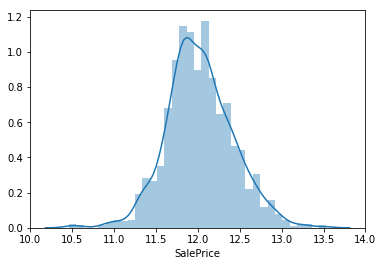

In [5]:
seaborn.distplot(data['SalePrice'])

## baseline

In [6]:
columns = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'HasBsmtFinSF2',
       'HasTotalBsmtSF', 'HasGarageArea', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtQual_0',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_0', 'BsmtExposure_0', 'BsmtExposure_Gd', 'BsmtFinType1_0',
       'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ', 'BsmtFinType2_Unf',
       'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_0', 'GarageFinish_0',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_0', 'GarageCond_0']
X = df_tr[columns]
X_te = df_te[columns]

In [7]:
len(columns)

37

In [8]:
X.shape, X_te.shape

((1095, 37), (365, 37))

In [9]:
clf = LinearRegression()
clf.fit(X, y)
numpy.sqrt(mean_squared_error(clf.predict(X_te), y_te))

0.22679647933467659

## pca

Use PCA to transform features. Hereafter the feature obtained from PCA will be used.

In [10]:
X = df_tr.drop(['SalePrice'], axis=1)
X_te = df_te.drop(['SalePrice'], axis=1)
pca = PCA()
X = pca.fit_transform(X)
X_te = pca.transform(X_te)

Cumulative sum shows that a few features can explain all variance. The first component explains more than 98% of all variance.

In [11]:
numpy.cumsum(pca.explained_variance_ratio_)

array([ 0.98571539,  0.99038389,  0.993692  ,  0.99651366,  0.99852322,
        0.99898767,  0.99925898,  0.99949919,  0.99967311,  0.99980298,
        0.99984308,  0.99988034,  0.99991326,  0.99994288,  0.99995872,
        0.99997084,  0.9999811 ,  0.99999074,  0.99999639,  0.99999832,
        0.99999919,  0.99999935,  0.99999945,  0.99999954,  0.99999961,
        0.99999968,  0.99999973,  0.99999977,  0.99999981,  0.99999984,
        0.99999985,  0.99999986,  0.99999987,  0.99999988,  0.99999989,
        0.99999989,  0.9999999 ,  0.9999999 ,  0.9999999 ,  0.99999991,
        0.99999991,  0.99999991,  0.99999992,  0.99999992,  0.99999992,
        0.99999992,  0.99999993,  0.99999993,  0.99999993,  0.99999993,
        0.99999993,  0.99999994,  0.99999994,  0.99999994,  0.99999994,
        0.99999994,  0.99999995,  0.99999995,  0.99999995,  0.99999995,
        0.99999995,  0.99999995,  0.99999995,  0.99999996,  0.99999996,
        0.99999996,  0.99999996,  0.99999996,  0.99999996,  0.99

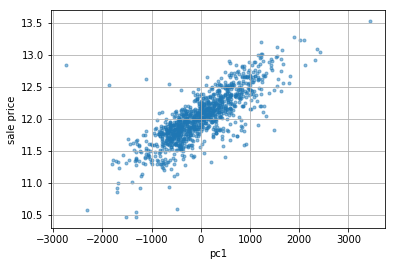

In [12]:
pyplot.scatter(X[:, 1], y, marker='.', alpha=0.5)
pyplot.xlabel('pc1')
pyplot.ylabel('sale price')
pyplot.grid()

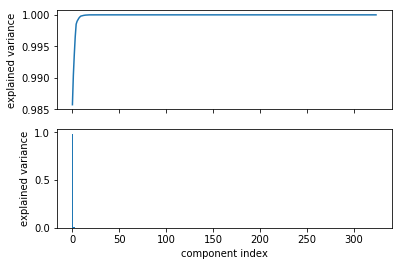

In [13]:
fig, (ax1, ax2) = pyplot.subplots(nrows=2, sharex=True)
ax1.plot(numpy.cumsum(pca.explained_variance_ratio_))
ax2.bar(numpy.arange(pca.n_components_), pca.explained_variance_ratio_)
ax2.set_xlabel('component index')
for ax in ax1, ax2:
    ax.set_ylabel('explained variance')

Use linear regression for increasing number of principal components.

In [14]:
rmsles = numpy.zeros(pca.n_components_)
for components in range(1, pca.n_components_ + 1):
    # evaluate linear regression
    clf = LinearRegression()
    clf.fit(X[:, :components], y)
    rmsles[components - 1] = numpy.sqrt(mean_squared_error(clf.predict(X_te[:, :components]), y_te))

After 265 pricipal component as input to the classifier the RMSLE increases dramatically.

In [15]:
rmsles[265:]

array([   108888.78935331,    108888.78935888,   1689910.40325764,
        10604878.9024102 ,  12212163.80159554,  12208681.15493168,
        11654596.30814885,   9302201.05871812,  14756594.81547478,
         1749782.68865123,   2623643.43875456,   2602168.48197043,
         2708526.19065385,   3258835.05973557,  15330333.20272811,
        15330333.20251338,  17397370.43128831,  10352423.77063717,
        15666789.2921128 ,  13844028.85525101,  10758462.95136465,
         8526985.71609293,   3425349.94642963,   2486177.30695306,
         4820575.57036875,   5397737.5607661 ,   4499381.94101336,
         6505719.03014184,   6606188.91955212,   4044329.34657148,
         1235116.12915724,    441115.11976531,   2664361.62218855,
          737724.54383938,    737724.54388404,    439094.09606067,
         4393201.66983104,   3492806.33873342,   3929781.2337626 ,
         4267286.48357819,   4177217.611038  ,   4708008.99597968,
         6412019.9059526 ,   6114545.773397  ,  10149627.37379

In [16]:
rmsles[:265]

array([ 0.38620412,  0.31143936,  0.3164349 ,  0.32116586,  0.32273015,
        0.32457759,  0.32374334,  0.31779164,  0.3103712 ,  0.30851143,
        0.30627377,  0.30656079,  0.30557503,  0.30541543,  0.30538035,
        0.30957202,  0.30829474,  0.3096994 ,  0.26208615,  0.26186907,
        0.25895369,  0.25542683,  0.25557775,  0.25601785,  0.25448839,
        0.2533177 ,  0.25347679,  0.24955322,  0.24911599,  0.24717542,
        0.24722726,  0.25311226,  0.25136462,  0.21788052,  0.20833758,
        0.20970401,  0.20967847,  0.20991496,  0.19736042,  0.19610844,
        0.1951185 ,  0.19527123,  0.19336337,  0.19172986,  0.19170807,
        0.19349845,  0.18740661,  0.18833813,  0.18890283,  0.18852733,
        0.18637152,  0.18675495,  0.18707734,  0.18705014,  0.18810488,
        0.18697436,  0.18711573,  0.18700081,  0.18648413,  0.18637886,
        0.18628733,  0.18669644,  0.18523942,  0.18508244,  0.18506562,
        0.18500118,  0.18708715,  0.18723301,  0.18994648,  0.18

The best result is for first 193 principal components.

In [17]:
numpy.argmin(rmsles) + 1, numpy.min(rmsles)

(193, 0.15956392019129564)

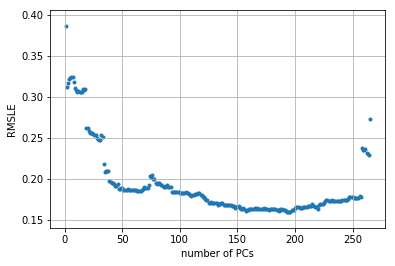

In [18]:
pyplot.scatter(range(1, pca.n_components_ + 1)[:265], rmsles[:265], marker='.')
pyplot.grid()
pyplot.ylabel('RMSLE')
pyplot.xlabel('number of PCs')

## remove discrete features

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 326 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(32), int64(294)
memory usage: 3.6 MB


In [20]:
data_float = data.select_dtypes(include=['float64'])
df_tr, df_te = train_test_split(data_float, test_size=0.25, random_state=458)

X = df_tr.drop(['SalePrice'], axis=1)
X_te = df_te.drop(['SalePrice'], axis=1)

pca = PCA()
X = pca.fit_transform(X)
X_te = pca.transform(X_te)

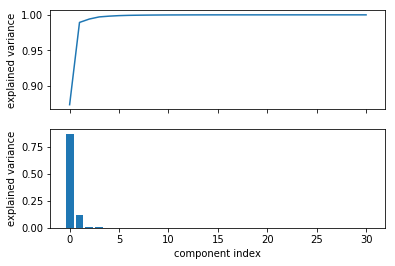

In [21]:
fig, (ax1, ax2) = pyplot.subplots(nrows=2, sharex=True)
ax1.plot(numpy.cumsum(pca.explained_variance_ratio_))
ax2.bar(numpy.arange(pca.n_components_), pca.explained_variance_ratio_)
ax2.set_xlabel('component index')
for ax in ax1, ax2:
    ax.set_ylabel('explained variance')

In [22]:
rmsles = numpy.zeros(pca.n_components_)
for components in range(1, pca.n_components_ + 1):
    # evaluate linear regression
    clf = LinearRegression()
    clf.fit(X[:, :components], y)
    rmsles[components - 1] = numpy.sqrt(mean_squared_error(clf.predict(X_te[:, :components]), y_te))
rmsles

array([ 0.380088  ,  0.35987687,  0.34826777,  0.33457415,  0.33306531,
        0.33094505,  0.27405987,  0.26979842,  0.26985926,  0.25421941,
        0.25481446,  0.2530882 ,  0.25052143,  0.25235557,  0.25311526,
        0.25301847,  0.25235259,  0.24546437,  0.24718521,  0.24273583,
        0.24354132,  0.2457302 ,  0.24530705,  0.24648025,  0.24980096,
        0.24838169,  0.24814647,  0.25458982,  0.23879171,  0.23027366,
        0.23320138])

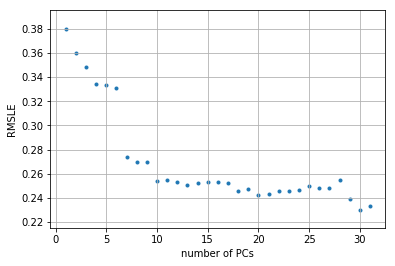

In [23]:
pyplot.scatter(range(1, pca.n_components_ + 1), rmsles, marker='.')
pyplot.grid()
pyplot.ylabel('RMSLE')
pyplot.xlabel('number of PCs')

The result without discrete features after PCA application is better than on raw data.

## removing indicators

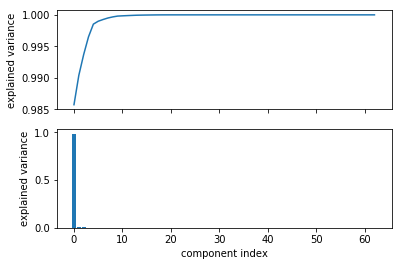

In [24]:
data_rich = data.drop(data.columns[data.nunique() <= 2], axis=1)
df_tr, df_te = train_test_split(data_rich, test_size=0.25, random_state=458)

X = df_tr.drop(['SalePrice'], axis=1)
X_te = df_te.drop(['SalePrice'], axis=1)

pca = PCA()
X = pca.fit_transform(X)
X_te = pca.transform(X_te)

fig, (ax1, ax2) = pyplot.subplots(nrows=2, sharex=True)
ax1.plot(numpy.cumsum(pca.explained_variance_ratio_))
ax2.bar(numpy.arange(pca.n_components_), pca.explained_variance_ratio_)
ax2.set_xlabel('component index')
for ax in ax1, ax2:
    ax.set_ylabel('explained variance')

In [25]:
rmsles = numpy.zeros(pca.n_components_)
for components in range(1, pca.n_components_ + 1):
    # evaluate linear Regression
    clf = LinearRegression()
    clf.fit(X[:, :components], y)
    rmsles[components - 1] = numpy.sqrt(mean_squared_error(clf.predict(X_te[:, :components]), y_te))
rmsles

array([ 0.38620413,  0.31143979,  0.31643538,  0.32116637,  0.32273061,
        0.32457811,  0.32374403,  0.31779249,  0.31037294,  0.30851333,
        0.30627738,  0.30656487,  0.30557898,  0.30541984,  0.3053845 ,
        0.30957282,  0.30829684,  0.30970033,  0.26213154,  0.2619146 ,
        0.25900006,  0.25528228,  0.25585225,  0.25585064,  0.25440485,
        0.25320394,  0.25334848,  0.24967822,  0.24928359,  0.24673663,
        0.24678318,  0.26607618,  0.25155863,  0.22269771,  0.19802374,
        0.19378294,  0.19393984,  0.1919613 ,  0.19265658,  0.19208108,
        0.19051685,  0.19048556,  0.19148259,  0.19569248,  0.19227248,
        0.1976741 ,  0.19770316,  0.19726365,  0.1968977 ,  0.19534682,
        0.19476953,  0.19241621,  0.19008404,  0.18383335,  0.18367282,
        0.18436271,  0.18474854,  0.18440935,  0.21733674,  0.23212113,
        0.22741989,  0.22741989,  0.22741989])

In [26]:
rmsles.min(), rmsles.argmin() + 1

(0.18367282057607767, 55)

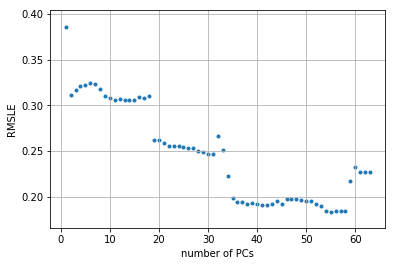

In [27]:
pyplot.scatter(range(1, pca.n_components_ + 1), rmsles, marker='.')
pyplot.grid()
pyplot.ylabel('RMSLE')
pyplot.xlabel('number of PCs')

Result without indicators is also almost as good as with all PCA features.

## feature selection

select as less as possible features

In [28]:
df_tr, df_te = train_test_split(data, test_size=0.25, random_state=458)
X = df_tr.drop(['SalePrice'], axis=1)
X_te = df_te.drop(['SalePrice'], axis=1)
pca = PCA()
X = pca.fit_transform(X)
X_te = pca.transform(X_te)

### univariate feature selection

#### f-test

In [29]:
rmsles = numpy.zeros(pca.n_components_)
for k in range(1, pca.n_components_ + 1):
    kbest = SelectKBest(f_regression, k=k)
    X_new = kbest.fit_transform(X, y)
    X_te_new = kbest.transform(X_te)
    clf = LinearRegression()
    clf.fit(X_new, y)
    rmsles[k - 1] = numpy.sqrt(mean_squared_error(clf.predict(X_te_new), y_te))
rmsles.argmin() + 1, rmsles.min()

(22, 0.20786357405154246)

(0, 0.5)

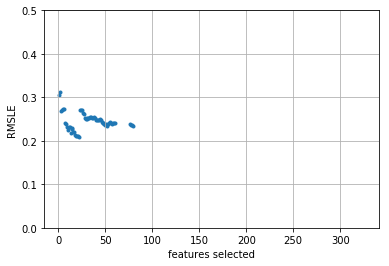

In [30]:
pyplot.scatter(range(1, pca.n_components_ + 1), rmsles, marker='.')
pyplot.grid()
pyplot.ylabel('RMSLE')
pyplot.xlabel('features selected')
pyplot.ylim(bottom=0, top=0.5)

### recursive feature elimination

In [31]:
# only indicators
data_float = data.drop(data.columns[data.nunique() <= 2], axis=1)
df_tr, df_te = train_test_split(data_float, test_size=0.25, random_state=458)
X = df_tr.drop(['SalePrice'], axis=1)
y = df_tr['SalePrice']
X_te = df_te.drop(['SalePrice'], axis=1)
y_te = df_te['SalePrice']

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_te_scaled = scaler.transform(X_te)

In [33]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [34]:
X_scaled.mean(axis=0)

array([ -1.62224369e-18,   4.54228233e-17,   1.13557058e-17,
        -2.50636650e-16,   3.24448738e-16,  -3.56082490e-15,
         4.07264278e-15,   2.43336553e-17,   8.27344281e-17,
        -7.78676971e-17,   4.54228233e-17,  -4.21783359e-17,
        -2.41714310e-16,   4.86673107e-17,   6.48897476e-18,
        -1.09501449e-16,   7.30009660e-17,   0.00000000e+00,
         3.08226301e-17,   1.07068083e-16,   2.06024948e-16,
        -3.48782393e-16,  -2.70103574e-16,   1.37890714e-17,
         1.09501449e-17,   7.17842832e-17,   1.46001932e-17,
        -4.86673107e-18,  -1.13557058e-17,   0.00000000e+00,
        -1.62224369e-17,   4.21783359e-17,  -2.59558990e-17,
         5.67785291e-17,   7.08944826e-14,  -3.65004830e-16,
         2.65966853e-15,  -2.27114116e-17,  -3.24448738e-18,
         1.16801546e-16,  -4.36383552e-16,  -1.13557058e-17,
         6.65119912e-17,   2.12513923e-16,   2.87137133e-16,
        -6.09963627e-16,   9.08456466e-16,  -1.11691478e-15,
         1.96210374e-15,

In [35]:
clf = LinearRegression()
clf.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

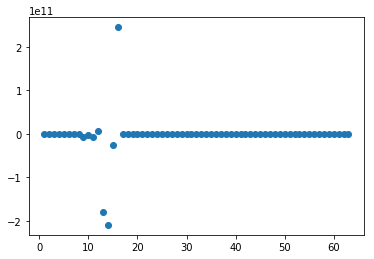

In [36]:
pyplot.scatter(range(1, len(clf.coef_) + 1), clf.coef_)

In [37]:
numpy.sqrt(mean_squared_error(clf.predict(X_te_scaled), y_te))

0.22660848682907969

In [38]:
rmsles = list()
for k in range(1, X.shape[1] + 1):
    clf = LinearRegression()
    rfe = RFE(estimator=clf, n_features_to_select=k, step=1)
    rfe.fit(X, y)
    clf.fit(rfe.transform(X), y)
    rmsles.append(numpy.sqrt(mean_squared_error(clf.predict(rfe.transform(X_te)), y_te)))    

In [39]:
rmsles = numpy.array(rmsles)
rmsles.min(), rmsles.argmin() + 1

(0.18152094362669091, 32)

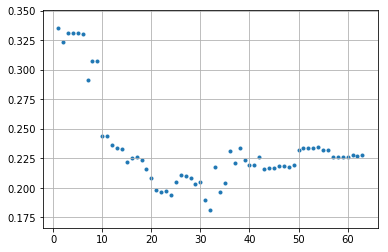

In [40]:
pyplot.scatter(range(1, X.shape[1] + 1), rmsles, marker='.')
pyplot.grid()